# Linear regression

Ví dụ 1

In [37]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

In [38]:
# Temp (F degree)
X = np.array([[194.5, 194.3, 197.9, 198.4, 199.4, 199.9, 200.9, 201.1, 201.4, 201.3,
               203.6, 204.6, 209.5, 208.6, 210.7, 211.9, 212.2]]).T

print(X)
# Press (Atm)
y = np.array([[20.79, 20.79, 22.4, 22.67, 23.15, 23.35, 23.89, 23.99, 24.02, 24.01, 25.14, 26.57
                  , 28.49, 27.76, 29.04, 29.88, 30.06]]).T

[[194.5]
 [194.3]
 [197.9]
 [198.4]
 [199.4]
 [199.9]
 [200.9]
 [201.1]
 [201.4]
 [201.3]
 [203.6]
 [204.6]
 [209.5]
 [208.6]
 [210.7]
 [211.9]
 [212.2]]


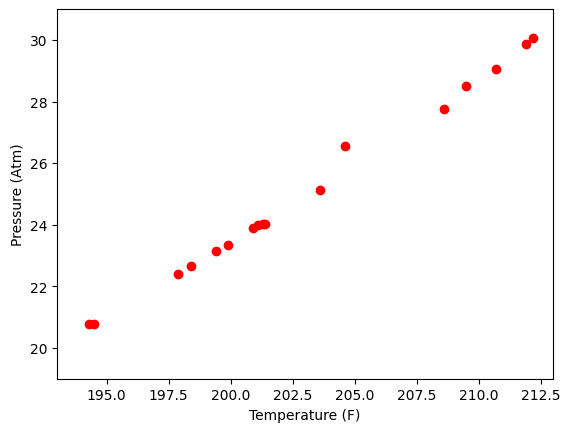

In [39]:
# Visualize data
plt.plot(X, y, 'ro')
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

In [40]:
one = np.ones((X.shape[0], 1))

Xbar = np.concatenate((one, X), axis=1)
print(Xbar)

[[  1.  194.5]
 [  1.  194.3]
 [  1.  197.9]
 [  1.  198.4]
 [  1.  199.4]
 [  1.  199.9]
 [  1.  200.9]
 [  1.  201.1]
 [  1.  201.4]
 [  1.  201.3]
 [  1.  203.6]
 [  1.  204.6]
 [  1.  209.5]
 [  1.  208.6]
 [  1.  210.7]
 [  1.  211.9]
 [  1.  212.2]]


In [41]:
w = np.dot(np.linalg.pinv(np.dot(Xbar.T, Xbar)), np.dot(Xbar.T, y))  #
print(w)

w0 = w[0][0]
print(w0)
w1 = w[1][0]
print(w1)

x0 = np.linspace(193, 213, 2)
y0 = w0 + w1 * x0

[[-81.06372713]
 [  0.5228924 ]]
-81.06372713252819
0.5228924008037078


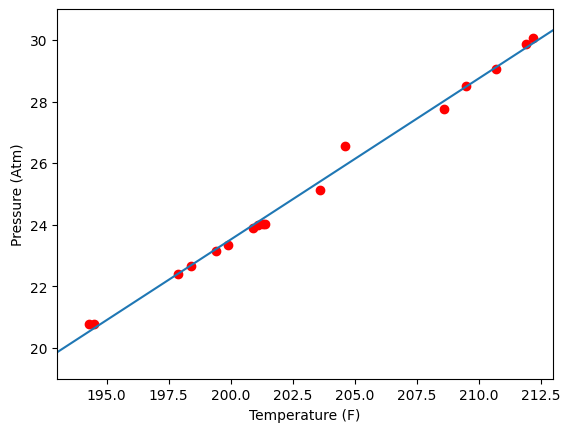

In [42]:
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro')  # data
plt.plot(x0, y0)  # the fitting line
plt.axis([193, 213, 19, 31])
plt.xlabel('Temperature (F)')
plt.ylabel('Pressure (Atm)')
plt.show()

Ví dụ 2

In [43]:
# để in ra hệ số của mô hình: print(<tên mô hình>.coef)
# in ra loss của mô hình: print(<tên biến mô hình>.score(X_test, Y_test))

import math
import numpy as np
import pandas as pd

with open('D:/Machine Learning/classroom/week2/fuel.txt.') as f:
    # df = pd.read_table('D:/Machine Learning/classroom/week2/fuel.txt')
    lines = f.readlines()

x_data = []
y_data = []
lines.pop(0)

for line in lines:
    splitted = line.replace('\n', '').split(',')
    splitted.pop(0)
    splitted = list(map(float, splitted))
    fuel = 1000 * splitted[1] / splitted[5]
    dlic = 1000 * splitted[0] / splitted[5]
    logMiles = math.log2(splitted[3])
    y_data.append([fuel])
    x_data.append([splitted[-1], dlic, splitted[2], logMiles])



x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

print(x_data)

[[1.80000000e+01 1.03138007e+03 2.34710000e+04 1.65271104e+01]
 [8.00000000e+00 1.03164106e+03 3.00640000e+04 1.37342862e+01]
 [1.80000000e+01 9.08597153e+02 2.55780000e+04 1.57535563e+01]
 [2.17000000e+01 9.46570576e+02 2.22570000e+04 1.65824360e+01]
 [1.80000000e+01 8.44703336e+02 3.22750000e+04 1.73647075e+01]
 [2.20000000e+01 9.89606180e+02 3.29490000e+04 1.63895977e+01]
 [2.50000000e+01 9.99593430e+02 4.06400000e+04 1.43519054e+01]
 [2.30000000e+01 9.24344838e+02 3.12550000e+04 1.25053154e+01]
 [2.00000000e+01 7.00195273e+02 3.73830000e+04 1.05830828e+01]
 [1.36000000e+01 1.00012416e+03 2.81450000e+04 1.68398312e+01]
 [7.50000000e+00 9.33302595e+02 2.79400000e+04 1.68179580e+01]
 [1.60000000e+01 8.29997134e+02 2.82210000e+04 1.20627208e+01]
 [2.50000000e+01 9.25193414e+02 2.41800000e+04 1.54990361e+01]
 [1.90000000e+01 8.19436731e+02 3.22590000e+04 1.70780570e+01]
 [1.50000000e+01 8.79235228e+02 2.70110000e+04 1.65209562e+01]
 [2.00000000e+01 8.67490690e+02 2.67230000e+04 1.679153

In [44]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
    # vector to transform
        x = A[n:, n]
        k = x.shape[0]

    # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

    # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v @ v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [45]:
def linear_regression(x_data,y_data):
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)


In [46]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Tax', "Dlic", "Income", 'LogMiles']
res = list(zip(line, w[0]))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: 154.19284457730757
                 Tax: -4.227983208329615
                Dlic: 0.47187121344198474
              Income: -0.006135330970417853
            LogMiles: 18.545274506048013


In [47]:

# Load training data here and assign to Xbar (obs. Data) and y (label)
# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept=False)

Xbar = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)
# fit_intercept = False for calculating the bias
regr.fit(Xbar, y_data)

print(regr.coef_)

print(regr.score(Xbar,y_data))
Xbar

[[ 1.54192845e+02 -4.22798321e+00  4.71871213e-01 -6.13533097e-03
   1.85452745e+01]]
0.510480359546414


array([[1.00000000e+00, 1.80000000e+01, 1.03138007e+03, 2.34710000e+04,
        1.65271104e+01],
       [1.00000000e+00, 8.00000000e+00, 1.03164106e+03, 3.00640000e+04,
        1.37342862e+01],
       [1.00000000e+00, 1.80000000e+01, 9.08597153e+02, 2.55780000e+04,
        1.57535563e+01],
       [1.00000000e+00, 2.17000000e+01, 9.46570576e+02, 2.22570000e+04,
        1.65824360e+01],
       [1.00000000e+00, 1.80000000e+01, 8.44703336e+02, 3.22750000e+04,
        1.73647075e+01],
       [1.00000000e+00, 2.20000000e+01, 9.89606180e+02, 3.29490000e+04,
        1.63895977e+01],
       [1.00000000e+00, 2.50000000e+01, 9.99593430e+02, 4.06400000e+04,
        1.43519054e+01],
       [1.00000000e+00, 2.30000000e+01, 9.24344838e+02, 3.12550000e+04,
        1.25053154e+01],
       [1.00000000e+00, 2.00000000e+01, 7.00195273e+02, 3.73830000e+04,
        1.05830828e+01],
       [1.00000000e+00, 1.36000000e+01, 1.00012416e+03, 2.81450000e+04,
        1.68398312e+01],
       [1.00000000e+00, 7.5000

# Ví dụ 3

In [48]:
data = pd.read_csv('D:/Machine Learning/classroom/week2/SAT_GPA.csv')

In [49]:
x = data['SAT']
y = data['GPA']

In [50]:
x

0     1714
1     1664
2     1760
3     1685
4     1693
      ... 
79    1936
80    1810
81    1987
82    1962
83    2050
Name: SAT, Length: 84, dtype: int64

In [51]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score,precision_score
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size= 60,shuffle=False,random_state=40)


In [52]:
x_train

0     1714
1     1664
2     1760
3     1685
4     1693
5     1670
6     1764
7     1764
8     1792
9     1850
10    1735
11    1775
12    1735
13    1712
14    1773
15    1872
16    1755
17    1674
18    1842
19    1786
20    1761
21    1722
22    1663
23    1687
24    1974
25    1826
26    1787
27    1821
28    2020
29    1794
30    1769
31    1934
32    1775
33    1855
34    1880
35    1849
36    1808
37    1954
38    1777
39    1831
40    1865
41    1850
42    1966
43    1702
44    1990
45    1925
46    1824
47    1956
48    1857
49    1979
50    1802
51    1855
52    1907
53    1634
54    1879
55    1887
56    1730
57    1953
58    1781
59    1891
Name: SAT, dtype: int64

In [53]:
y_test

60    3.49
61    3.49
62    3.50
63    3.51
64    3.51
65    3.52
66    3.52
67    3.54
68    3.58
69    3.58
70    3.59
71    3.59
72    3.60
73    3.60
74    3.61
75    3.62
76    3.64
77    3.65
78    3.71
79    3.71
80    3.71
81    3.73
82    3.76
83    3.81
Name: GPA, dtype: float64

In [54]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [55]:
pred = linear_model.LinearRegression(fit_intercept=False)
#
predict = pred.fit(x_train.reshape(-1,1),y_train)

print(pred.coef_)



[0.0017752]
